# Receipes for several Regression implementations and Regularization

In [1]:
#Load Packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import mean_squared_error
%matplotlib inline 

In [2]:
%pwd

'/Users/mpgartland/Documents/Courses/Predictive Models/Pred_Models_git/Week 1 part 2/code'

In [3]:
cd '/Users/mpgartland/Documents/Courses/Predictive Models/Pred_Models_git/Week 1 part 2/'

/Users/mpgartland/Documents/Courses/Predictive Models/Pred_Models_git/Week 1 part 2


In [4]:
#Load Data
#load the Boston House datasets.
#The diabetes dataset consists of 13 economic variables
#measure on 506 houses, and an median value (MEDV) as the target:
dataset = pd.read_csv("data/boston_house_prices.csv", sep=",", header=1)
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
#In a imported data set, you would break the data into two objects dataname.features (your PV) and dataname.target (your target/DV)
#There are a lot of ways to do this- here is one.
#View our .data and .target
dataset.target=dataset['MEDV'] 
dataset.features=dataset.drop(['MEDV'], axis=1)                         
print(dataset.target.shape)
print(dataset.features.shape)

(506,)
(506, 13)


In [6]:
# Linear Regression-Ordinary Least Squares
from sklearn.linear_model import LinearRegression

# fit a linear regression model to the data
model_LR = LinearRegression(normalize=True)
model_LR.fit(dataset.features, dataset.target)
print(model_LR)
# make predictions
expected_LR = dataset.target
predicted_LR = model_LR.predict(dataset.features)
# summarize the fit of the model
print("Coef", model_LR.intercept_, model_LR.coef_)
print("MSE", mean_squared_error(expected_LR, predicted_LR))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)
Coef 36.4911032804 [ -1.07170557e-01   4.63952195e-02   2.08602395e-02   2.68856140e+00
  -1.77957587e+01   3.80475246e+00   7.51061703e-04  -1.47575880e+00
   3.05655038e-01  -1.23293463e-02  -9.53463555e-01   9.39251272e-03
  -5.25466633e-01]
MSE 21.8977792177


Just for explanation purposes: Showing the variance of the Coefficient for LR

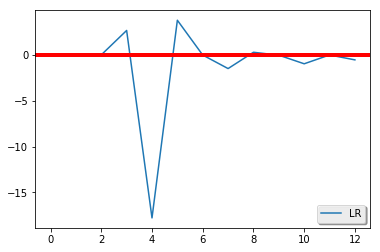

In [7]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [8]:
# Ridge Regression
from sklearn.linear_model import Ridge

# fit a ridge regression model to the data
model_RG = Ridge(alpha=20)
model_RG.fit(dataset.features, dataset.target)
print(model_RG)
# make predictions
expected_RG = dataset.target
predicted_RG= model_RG.predict(dataset.features)
# summarize the fit of the model
print("Coef", model_RG.intercept_, model_RG.coef_)
print("MSE", mean_squared_error(expected_RG, predicted_RG))

Ridge(alpha=20, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)
Coef 28.5631635058 [-0.10060401  0.05065136 -0.04698636  1.57414364 -1.27135531  3.47559439
 -0.00941967 -1.22949444  0.28487392 -0.01444316 -0.79939841  0.01007353
 -0.57847453]
MSE 22.8584504371


# Example of a Grid Search with CV. On Regression, grid search displays and finds the optimal metric "R2". On classification models it uses "accuracy", all based on fit (not predict). 

In [9]:
# use a full grid over several parameters and cross validate 5 times
from sklearn.model_selection import GridSearchCV
param_grid = {"alpha": [.01,.1, .5, 1, 2]}
#param_grid={"alpha": [1,10,1]} this does a range 1 through 10 changes by a factor of 1. 
#param_grid={"alpha": [.01,1,.05]} this does a range 1 through 1 changes by a factor of .05

# run grid search
grid_search = GridSearchCV(model_RG, param_grid=param_grid,n_jobs=-1,cv=5)
grid_search.fit(dataset.features, dataset.target)
print("Grid Scores", grid_search.cv_results_)
print("Best", grid_search.best_params_)                                   

Grid Scores {'split0_test_score': array([ 0.63905648,  0.64270074,  0.65343564,  0.66040085,  0.66652568]), 'split1_test_score': array([ 0.71450033,  0.72281614,  0.73753093,  0.7408794 ,  0.74024496]), 'split2_test_score': array([ 0.58732776,  0.59446504,  0.61528407,  0.62881062,  0.64112711]), 'split3_test_score': array([ 0.0784935 ,  0.07907754,  0.08139187,  0.0843547 ,  0.09102672]), 'split4_test_score': array([-0.26130288, -0.24666381, -0.20566709, -0.1795503 , -0.15335502]), 'mean_test_score': array([ 0.3521831 ,  0.35904083,  0.37694259,  0.38751941,  0.39764632]), 'std_test_score': array([ 0.37934791,  0.37758776,  0.37133676,  0.36617908,  0.3594461 ]), 'rank_test_score': array([5, 4, 3, 2, 1], dtype=int32), 'split0_train_score': array([ 0.74652726,  0.74645554,  0.74540377,  0.74372005,  0.7409476 ]), 'split1_train_score': array([ 0.72761588,  0.72746346,  0.7258159 ,  0.72391339,  0.72155392]), 'split2_train_score': array([ 0.69502902,  0.69489088,  0.69293404,  0.68991892

Just for explanation purposes: Showing the variance of the Coefficient for LR and Ridge

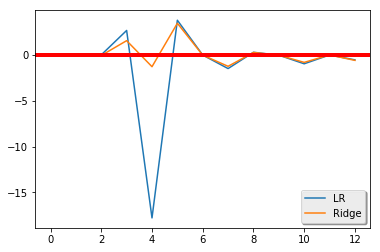

In [10]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [11]:
# Lasso Regression-Least Absolute Shrinkage and Selection Operator
from sklearn.linear_model import Lasso

# fit a LASSO model to the data
model_LAS = Lasso(alpha=1)
model_LAS.fit(dataset.features, dataset.target)
print(model_LAS)
# make predictions
expected_LAS = dataset.target
predicted_LAS = model_LAS.predict(dataset.features)
# summarize the fit of the model
print("Coef", model_LAS.intercept_,model_LAS.coef_)
print("MSE", mean_squared_error(expected_LAS, predicted_LAS))

Lasso(alpha=1, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)
Coef 41.0660847685 [-0.06342255  0.04916867 -0.          0.         -0.          0.94678567
  0.02092737 -0.66900864  0.26417501 -0.01520915 -0.72319901  0.00829117
 -0.76143296]
MSE 26.7990335405


Just for explanation purposes: Showing the variance of the Coefficient for LR, Ridge and Lasso

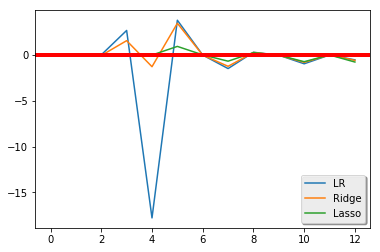

In [12]:
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [13]:
# ElasticNet Regression
from sklearn.linear_model import ElasticNet

# fit a model to the data
model_EN = ElasticNet(alpha=2)
model_EN.fit(dataset.features, dataset.target)
print(model_EN)
# make predictions
expected_EN = dataset.target
predicted_EN = model_EN.predict(dataset.features)
# summarize the fit of the model
print("Coef", model_EN.intercept_, model_EN.coef_)
print("MSE", mean_squared_error(expected_EN, predicted_EN))

ElasticNet(alpha=2, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=1000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)
Coef 42.1589771687 [-0.05932403  0.04955408 -0.          0.         -0.          0.27870153
  0.03275004 -0.44059318  0.25369494 -0.01523125 -0.60843696  0.00768809
 -0.79183787]
MSE 29.1017857775


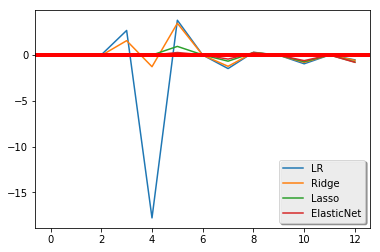

In [14]:
#Plot all the model coefficients
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

In [15]:
#LARS Regression Model- Least Angle Regression model
from sklearn import linear_model
model_LAR = linear_model.Lars(n_nonzero_coefs=1)
model_LAR.fit(dataset.features, dataset.target)
print(model_LAR)
# make predictions
expected_LAR = dataset.target
predicted_LAR = model_LAR.predict(dataset.features)
# summarize the fit of the model
mse_LAR = np.mean((predicted_LAR-expected_LAR)**2)
print("Coef", model_LAR.intercept_, model_LAR.coef_)
print("MSE", mean_squared_error(expected_LAR, predicted_LAR))

Lars(copy_X=True, eps=2.2204460492503131e-16, fit_intercept=True,
   fit_path=True, n_nonzero_coefs=1, normalize=True, positive=False,
   precompute='auto', verbose=False)
Coef 24.317854487 [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.         -0.14107636]
MSE 71.7898855211


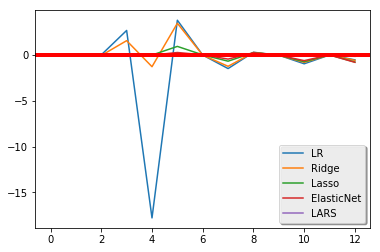

In [16]:
#Plot all the model coefficients
fig, ax = plt.subplots()
plt.plot(model_LR.coef_, label='LR')
plt.plot(model_RG.coef_, label='Ridge')
plt.plot(model_LAS.coef_, label='Lasso')
plt.plot(model_EN.coef_, label='ElasticNet')
plt.plot(model_LAR.coef_, label='LARS')
plt.axhline(linewidth=4, color='r') # for reference
legend = ax.legend(loc='lower right', shadow=True)
plt.show()

# USING the STATSMODEL instead of skLearn


In [17]:

import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

# Load data
url = 'http://vincentarelbundock.github.io/Rdatasets/csv/HistData/Guerry.csv'
dat = pd.read_csv(url)


# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('Lottery ~ Literacy + np.log(Pop1831)', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.333
Method:                 Least Squares   F-statistic:                     22.20
Date:                Mon, 29 May 2017   Prob (F-statistic):           1.90e-08
Time:                        12:16:36   Log-Likelihood:                -379.82
No. Observations:                  86   AIC:                             765.6
Df Residuals:                      83   BIC:                             773.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
Intercept         246.4341     35.233     

In [18]:
#USING the STATSMODEL instead of skLearn with the diabetes dataset

# Fit regression model 
results1 = smf.ols('dataset.target~ dataset.features', data=dataset).fit()

# Inspect the results
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:         dataset.target   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 29 May 2017   Prob (F-statistic):          6.95e-135
Time:                        12:16:36   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               36.4911 

In [19]:
#extra individually
print('Parameters: ', results.params)
print('Standard errors: ', results.bse)
print('Predicted values: ', results.predict())

Parameters:  Intercept          246.434135
Literacy            -0.488923
np.log(Pop1831)    -31.311392
dtype: float64
Standard errors:  Intercept          35.232504
Literacy            0.127588
np.log(Pop1831)     5.976778
dtype: float64
Predicted values:  [ 45.28111552  26.10731517  61.66689491  65.84571262  60.50666251
  50.65364442  36.18545491  64.36053682  45.16226913  54.50128015
  47.05726094  43.59906372  26.75575698  57.33509109  44.31149942
  36.4093396   66.44356669  62.5179869   31.445032    38.37361199
  60.4349197   44.14479871  35.96987559  47.35193753  32.05500621
  43.73139604  43.02036876  42.80379617  41.5681693   48.01756606
  29.0649797   41.34530592  36.80711795  65.8333425   54.95241358
  34.66823101  30.8711604   56.14387953  62.18620796  45.34919918
  58.41110071  42.04335068  46.75969329  57.84147286  48.13693343
  78.42531729  42.68049242  25.57205184  33.38962699  38.36831808
  53.49369591  24.39057162  30.17352354  49.46837681  29.66117011
  59.94201695   8